In [28]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [15, 5]

In [2]:
%load_ext autoreload
%autoreload 2
%run '../main.py'

In [3]:
dataSetOps = DataSetOps()

dataSetOps.import_years(2010, 2017)

dataSetOps.prepare()


df = dataSetOps.df

dataSetOps2 = DataSetOps()

dataSetOps2.import_years(2018, 2018)

dataSetOps2.prepare()


df2 = dataSetOps2.df

In [4]:
# variables
mavgl = 30
window = 20
epilson = 0.0001
ew = 1 #3

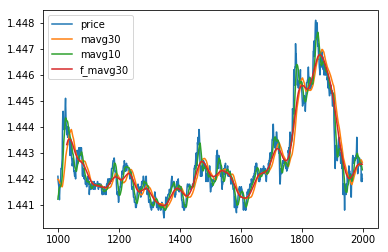

In [5]:
mavgl = str(mavgl)
df['f_mavg' + mavgl] = df['mavg' + mavgl].shift(-window).rolling(window=30).mean()
df['f_price'] = df['price'].shift(-window).rolling(window=window).max()
df['value'] = df['f_mavg' + mavgl] - df['mavg' + mavgl] > epilson
df['value_real'] = df['f_price'] - df['price'] > epilson * ew
df['value'] = df['value'] & df['value_real']
df[['price', 'mavg' + mavgl, 'mavg10', 'f_mavg' + mavgl]].head(1000).plot()

0.1820942747614413


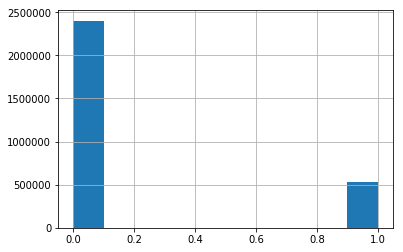

In [6]:
df['value'].astype(int).hist()
print(len(df[df['value']]) / (len(df)))

In [7]:
X = df[['price', 'mavg10', 'mavg20', 'mavg50', 'mavg80', 'mavg100', 'mavg1000']]
Y = df['value']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

    
#Initializing Neural Network
classifier = Sequential()

class1 = Dense(output_dim = 16, init = 'uniform', activation = 'relu', input_dim = 7)
class2 = Dense(output_dim = 16, init = 'uniform', activation = 'relu')
class3 = Dense(output_dim = 16, init = 'uniform', activation = 'relu')
# Adding the input layer and the first hidden layer
classifier.add(class1)
# Adding the second hidden layer
classifier.add(class2)
classifier.add(class3)
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling Neural Network
from keras import metrics
metric_names = [metrics.mae, 'accuracy']
classifier.compile(optimizer='adam', loss = 'mean_squared_error', metrics=metric_names)


# Fitting our model 
classifier.fit(X_train, y_train, batch_size = 20, epochs = 60*5)
import random
classifier.save("/tmp/mavg_classifier_" + str(random.randint(100000, 999999)))

Using TensorFlow backend.
/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=7, units=16, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  if sys.path[0] == '':
/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`


Epoch 1/300
2641896/2641896 [==============================] - 57s 22us/step - loss: 0.1395 - mean_absolute_error: 0.2786 - acc: 0.8231
Epoch 2/300
2641896/2641896 [==============================] - 57s 21us/step - loss: 0.1275 - mean_absolute_error: 0.2544 - acc: 0.8318
Epoch 3/300
2641896/2641896 [==============================] - 57s 21us/step - loss: 0.1235 - mean_absolute_error: 0.2464 - acc: 0.8356
Epoch 4/300
2641896/2641896 [==============================] - 57s 21us/step - loss: 0.1202 - mean_absolute_error: 0.2398 - acc: 0.8391
Epoch 5/300
2641896/2641896 [==============================] - 57s 22us/step - loss: 0.1180 - mean_absolute_error: 0.2355 - acc: 0.8415
Epoch 6/300
2641896/2641896 [==============================] - 57s 21us/step - loss: 0.1160 - mean_absolute_error: 0.2316 - acc: 0.8435
Epoch 7/300
2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1147 - mean_absolute_error: 0.2290 - acc: 0.8451
Epoch 8/300
2641896/2641896 [===================

2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1050 - mean_absolute_error: 0.2091 - acc: 0.8551
Epoch 61/300
2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1049 - mean_absolute_error: 0.2092 - acc: 0.8554
Epoch 62/300
2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1050 - mean_absolute_error: 0.2093 - acc: 0.8553
Epoch 63/300
2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1049 - mean_absolute_error: 0.2092 - acc: 0.8553
Epoch 64/300
2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1048 - mean_absolute_error: 0.2090 - acc: 0.8552
Epoch 65/300
2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1048 - mean_absolute_error: 0.2089 - acc: 0.8553
Epoch 66/300
2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1047 - mean_absolute_error: 0.2088 - acc: 0.8557
Epoch 67/300
2641896/2641896 [========================

2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1031 - mean_absolute_error: 0.2057 - acc: 0.8567
Epoch 120/300
2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1031 - mean_absolute_error: 0.2057 - acc: 0.8568
Epoch 121/300
2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1031 - mean_absolute_error: 0.2056 - acc: 0.8567
Epoch 122/300
2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1030 - mean_absolute_error: 0.2055 - acc: 0.8567
Epoch 123/300
2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1030 - mean_absolute_error: 0.2054 - acc: 0.8569
Epoch 124/300
2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1031 - mean_absolute_error: 0.2056 - acc: 0.8567
Epoch 125/300
2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1030 - mean_absolute_error: 0.2054 - acc: 0.8569
Epoch 126/300
2641896/2641896 [=================

2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1022 - mean_absolute_error: 0.2040 - acc: 0.8575
Epoch 179/300
2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1022 - mean_absolute_error: 0.2039 - acc: 0.8575
Epoch 180/300
2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1022 - mean_absolute_error: 0.2039 - acc: 0.8576
Epoch 181/300
2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1022 - mean_absolute_error: 0.2038 - acc: 0.8576
Epoch 182/300
2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1021 - mean_absolute_error: 0.2036 - acc: 0.8575
Epoch 183/300
2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1021 - mean_absolute_error: 0.2038 - acc: 0.8576
Epoch 184/300
2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1021 - mean_absolute_error: 0.2036 - acc: 0.8577
Epoch 185/300
2641896/2641896 [=================

2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1016 - mean_absolute_error: 0.2026 - acc: 0.8581
Epoch 238/300
2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1016 - mean_absolute_error: 0.2027 - acc: 0.8580
Epoch 239/300
2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1016 - mean_absolute_error: 0.2028 - acc: 0.8580
Epoch 240/300
2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1015 - mean_absolute_error: 0.2026 - acc: 0.8582
Epoch 241/300
2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1016 - mean_absolute_error: 0.2028 - acc: 0.8580
Epoch 242/300
2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1015 - mean_absolute_error: 0.2027 - acc: 0.8581
Epoch 243/300
2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1015 - mean_absolute_error: 0.2026 - acc: 0.8580
Epoch 244/300
2641896/2641896 [=================

2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1012 - mean_absolute_error: 0.2019 - acc: 0.8583
Epoch 297/300
2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1012 - mean_absolute_error: 0.2019 - acc: 0.8582
Epoch 298/300
2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1011 - mean_absolute_error: 0.2018 - acc: 0.8585
Epoch 299/300
2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1012 - mean_absolute_error: 0.2019 - acc: 0.8583
Epoch 300/300
2641896/2641896 [==============================] - 56s 21us/step - loss: 0.1012 - mean_absolute_error: 0.2019 - acc: 0.8584


In [17]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
from lib.helper import AccuracyCalculator

# Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, (y_pred > 0.5))

AccuracyCalculator.class_accuracy(cm)
AccuracyCalculator.optimistic_accuracy(y_pred[:,0], y_test, 100)
risk_hist_df = AccuracyCalculator.risk_hist(y_pred[:,0], y_test)


class_accuracy => accuracy:  0.7071609120682703 risk:  0.36066774421658754
optimistic_accuracy => risk:  0.24 min pass point:  0.79599327


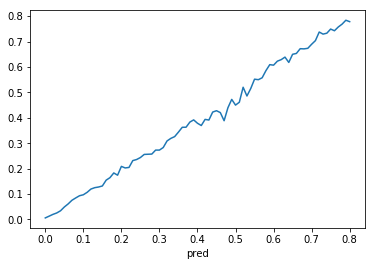

In [18]:
(1-risk_hist_df.risk).plot()

In [19]:
cm

array([[225834,  14281],
       [ 28115,  25315]])

In [12]:
dfx = df[df['value']]
p_f = len(dfx[dfx['value_real']]) / len(dfx)
p_r = cm[1,1] / (cm[1,1] + cm[0,1])
print('real prob', p_f , p_r, p_f * p_r)

real prob 1.0 nan nan


/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


class_accuracy => accuracy:  0.5 risk:  1
optimistic_accuracy => risk:  0.07 min pass point:  0.7979271
[[ 822909       0]
 [2112532       0]]


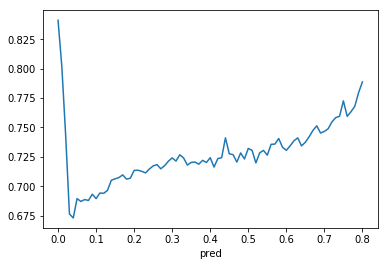

In [13]:
y_all_pred = classifier.predict(sc.transform(X))
y_f_price_real = df['value_real']
cm = confusion_matrix(y_f_price_real, (y_all_pred > 0.8))

AccuracyCalculator.class_accuracy(cm)
AccuracyCalculator.optimistic_accuracy(y_all_pred[:,0], y_f_price_real, 100)
risk_hist_df = AccuracyCalculator.risk_hist(y_all_pred[:,0], y_f_price_real)

print(cm)

(1-risk_hist_df.risk).plot()



1.0
534527


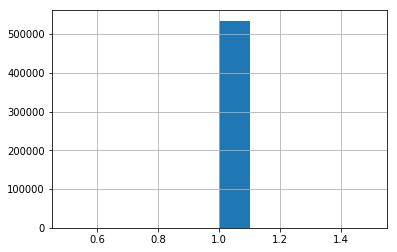

In [14]:
dfr = df[df['value']]
dfr['value_real'].astype(int).hist()
print(len(dfr[dfr['value_real']]) / (len(dfr)))
print(len(dfr['value_real']))

class_accuracy => accuracy:  0.5 risk:  0.2860841015279707
optimistic_accuracy => risk:  0.23 min pass point:  0.75204957
[[    0  4531]
 [    0 11307]]


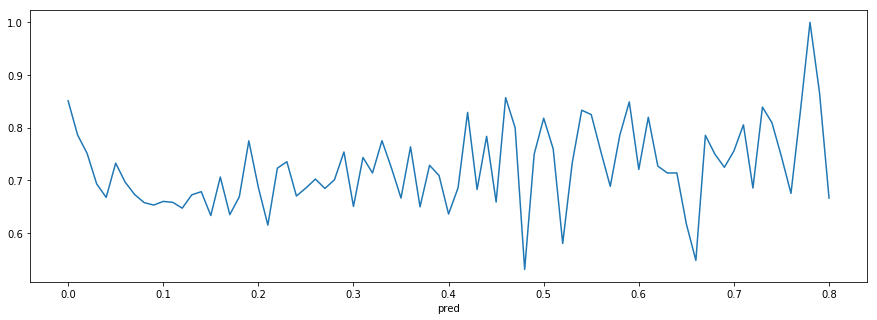

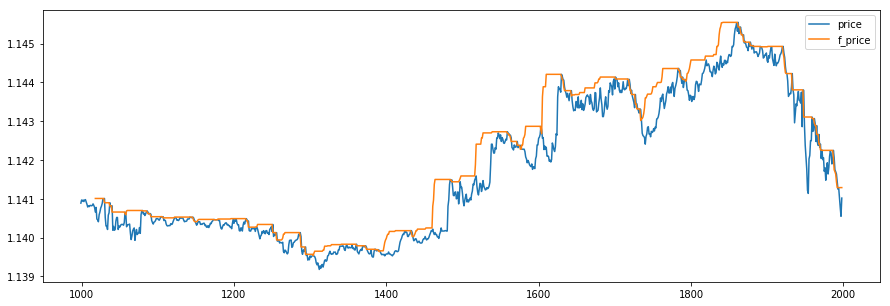

In [30]:
mavgl = str(mavgl)
df2['f_price'] = df2['price'].shift(-window).rolling(window=window).max()
df2['value_real'] = df2['f_price'] - df2['price'] > epilson * ew

X2 = df2[['price', 'mavg10', 'mavg20', 'mavg50', 'mavg80', 'mavg100', 'mavg1000']]

y_all_pred2 = classifier.predict(sc.transform(X2))
y_f_price_real2 = df2['value_real']
cm2 = confusion_matrix(y_f_price_real2, (y_all_pred2 >=0))

AccuracyCalculator.class_accuracy(cm2)
AccuracyCalculator.optimistic_accuracy(y_all_pred2[:,0], y_f_price_real2, 100)
risk_hist_df2 = AccuracyCalculator.risk_hist(y_all_pred2[:,0], y_f_price_real2)

print(cm2)

(1-risk_hist_df2.risk).plot()
df2[['price', 'f_price']].head(1000).plot()


In [16]:

classifier.fit(X_train, y_train, batch_size = 2, epochs = 60 * 8)

Epoch 1/480
2641896/2641896 [==============================] - 547s 207us/step - loss: 0.1068 - mean_absolute_error: 0.2120 - acc: 0.8524
Epoch 2/480
2641896/2641896 [==============================] - 547s 207us/step - loss: 0.1066 - mean_absolute_error: 0.2116 - acc: 0.8525
Epoch 3/480
1407890/2641896 [==============>...............] - ETA: 4:17 - loss: 0.1065 - mean_absolute_error: 0.2113 - acc: 0.8526

KeyboardInterrupt: 

In [ ]:

import random
classifier.save("/tmp/mavg_classifier_" + str(random.randint(100000, 999999)))